In [32]:
import torch
import pandas as pd
import numpy as np
from torch import nn
import os
import sklearn
import matplotlib.pyplot as plt
import sys

### For Colab

In [33]:
# # This mounts your Google Drive to the Colab VM.
# from google.colab import drive
# drive.mount('/content/drive')

# # TODO: Enter the foldername in your Drive where you have saved the unzipped
# # assignment folder, e.g. 'cs231n/assignments/assignment1/'
# FOLDERNAME = 'PyTorch Test Project/N_TXT'
# assert FOLDERNAME is not None, "[!] Enter the foldername."

# # Now that we've mounted your Drive, this ensures that
# # the Python interpreter of the Colab VM can load
# # python files from within it.
# import sys
# sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# # This downloads the CIFAR-10 dataset to your Drive
# # if it doesn't already exist.
# # %cd /content/drive/My\ Drive/$FOLDERNAME/cs231n/datasets/
# # !bash get_datasets.sh
# # %cd /content/drive/My\ Drive/$FOLDERNAME

In [34]:
# path = "/content/drive/MyDrive/PyTorch Test Project/N_TXT"

# os.chdir(path)

# fx_data = np.array([], dtype=np.float32)

# #gets data from file specified by file_path
# def get_contents(file_path):
#     global fx_data
#     skip_lines = 7

#     with open(file_path,'r') as file:

#         for skips in range(skip_lines):
#             next(file)

#         lines = file.readlines()[:-1]

#         for line in lines:
#             data = line.split()[-1]
#             fx_data = np.append(fx_data, np.float32(data))
#             #print(data)

In [35]:
path = "/Users/jm/VS Code/ML/Time Series Prediction/N_TXT"

os.chdir(path)

fx_data = np.array([], dtype=np.float32)

#gets data from file specified by file_path
def get_contents(file_path):
    global fx_data
    skip_lines = 7

    with open(file_path,'r') as file:

        for skips in range(skip_lines):
            next(file)

        lines = file.readlines()[:-1]

        for line in lines:
            data = line.split()[-1]
            fx_data = np.append(fx_data, np.float32(data))
            #print(data)

In [36]:
#go through all files in directory and extract data from txt files
for file in os.listdir():
    if file.endswith(".txt"):
        file_path = f"{path}/{file}"
        print(f"Currently working on: {file_path}")
        get_contents(file_path)

fx_data.dtype

Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/9Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/8Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/1Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/3Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/10Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/2Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/11Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/7Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/6Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/4Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/5Npie.txt


dtype('float32')

In [37]:
#create time "sample" for dataframe
time_data = np.array([], dtype=np.float32)

for x in range(len(fx_data)):
    time_data = np.append(time_data, np.float32(x))
    type(x)

time_data, time_data[0].dtype

(array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 1.87857e+05,
        1.87858e+05, 1.87859e+05], dtype=float32),
 dtype('float32'))

In [38]:
#create time "sample" for dataframe
dataset = pd.DataFrame({"Time": time_data,
                        "FX Channel": fx_data})
dataset

,Time,FX Channel
0,0.0,-0.6
1,1.0,-0.6
2,2.0,-0.6
3,3.0,-0.6
4,4.0,-0.6
...,...,...
187855,187855.0,4.1
187856,187856.0,4.1
187857,187857.0,4.1
187858,187858.0,4.1


([<matplotlib.lines.Line2D at 0x339938a30>], pandas.core.frame.DataFrame)

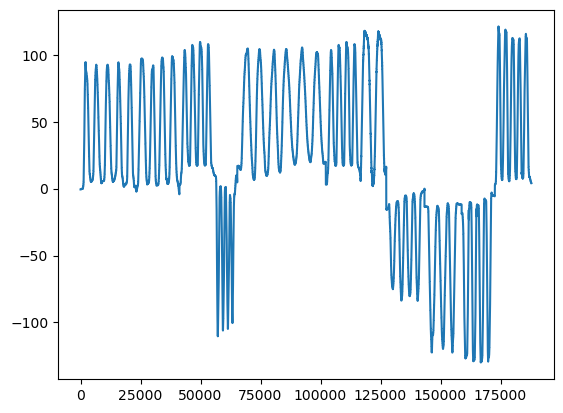

In [39]:
plt.plot(dataset["Time"], dataset["FX Channel"]), type(dataset)

In [40]:
from copy import deepcopy as dc

def lstm_dataframe(df, n_steps):
    df = dc(df)
    
    # df.set_index("FX Channel")

    for i in range(1, n_steps+1):
        df[f'Time(t-{i})'] = df['Time'].shift(i)
        
    df.dropna(inplace=True)
    
    return df

n_steps = 7
shifted_df = lstm_dataframe(dataset, n_steps)

shifted_df, shifted_df.shape

(            Time  FX Channel  Time(t-1)  Time(t-2)  Time(t-3)  Time(t-4)  \
 7            7.0        -0.6        6.0        5.0        4.0        3.0   
 8            8.0        -0.6        7.0        6.0        5.0        4.0   
 9            9.0        -0.6        8.0        7.0        6.0        5.0   
 10          10.0        -0.6        9.0        8.0        7.0        6.0   
 11          11.0        -0.6       10.0        9.0        8.0        7.0   
 ...          ...         ...        ...        ...        ...        ...   
 187855  187855.0         4.1   187854.0   187853.0   187852.0   187851.0   
 187856  187856.0         4.1   187855.0   187854.0   187853.0   187852.0   
 187857  187857.0         4.1   187856.0   187855.0   187854.0   187853.0   
 187858  187858.0         4.1   187857.0   187856.0   187855.0   187854.0   
 187859  187859.0         4.1   187858.0   187857.0   187856.0   187855.0   
 
         Time(t-5)  Time(t-6)  Time(t-7)  
 7             2.0        1.0  

In [41]:
columnsTitles = ['FX Channel', 'Time']

for i in range(n_steps+1):
    columnsTitles.append(f"Time(t-{i})")

shifted_df = shifted_df.reindex(columns=columnsTitles)
shifted_df = shifted_df.drop(columns=["Time(t-0)"])

shifted_df, type(columnsTitles), len(columnsTitles), shifted_df.shape

(        FX Channel      Time  Time(t-1)  Time(t-2)  Time(t-3)  Time(t-4)  \
 7             -0.6       7.0        6.0        5.0        4.0        3.0   
 8             -0.6       8.0        7.0        6.0        5.0        4.0   
 9             -0.6       9.0        8.0        7.0        6.0        5.0   
 10            -0.6      10.0        9.0        8.0        7.0        6.0   
 11            -0.6      11.0       10.0        9.0        8.0        7.0   
 ...            ...       ...        ...        ...        ...        ...   
 187855         4.1  187855.0   187854.0   187853.0   187852.0   187851.0   
 187856         4.1  187856.0   187855.0   187854.0   187853.0   187852.0   
 187857         4.1  187857.0   187856.0   187855.0   187854.0   187853.0   
 187858         4.1  187858.0   187857.0   187856.0   187855.0   187854.0   
 187859         4.1  187859.0   187858.0   187857.0   187856.0   187855.0   
 
         Time(t-5)  Time(t-6)  Time(t-7)  
 7             2.0        1.0  

In [42]:
dataset = shifted_df.to_numpy()

dataset.shape, dataset


((187853, 9),
 array([[-6.00000e-01,  7.00000e+00,  6.00000e+00, ...,  2.00000e+00,
          1.00000e+00,  0.00000e+00],
        [-6.00000e-01,  8.00000e+00,  7.00000e+00, ...,  3.00000e+00,
          2.00000e+00,  1.00000e+00],
        [-6.00000e-01,  9.00000e+00,  8.00000e+00, ...,  4.00000e+00,
          3.00000e+00,  2.00000e+00],
        ...,
        [ 4.10000e+00,  1.87857e+05,  1.87856e+05, ...,  1.87852e+05,
          1.87851e+05,  1.87850e+05],
        [ 4.10000e+00,  1.87858e+05,  1.87857e+05, ...,  1.87853e+05,
          1.87852e+05,  1.87851e+05],
        [ 4.10000e+00,  1.87859e+05,  1.87858e+05, ...,  1.87854e+05,
          1.87853e+05,  1.87852e+05]], dtype=float32))

In [43]:
X = dataset[:, 1:]
y = dataset[:, 0]

X.shape, y.shape, y[0], X[0]

((187853, 8),
 (187853,),
 -0.6,
 array([7., 6., 5., 4., 3., 2., 1., 0.], dtype=float32))

In [44]:
X = dc(np.flip(X, axis=1))
X

array([[0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 5.00000e+00,
        6.00000e+00, 7.00000e+00],
       [1.00000e+00, 2.00000e+00, 3.00000e+00, ..., 6.00000e+00,
        7.00000e+00, 8.00000e+00],
       [2.00000e+00, 3.00000e+00, 4.00000e+00, ..., 7.00000e+00,
        8.00000e+00, 9.00000e+00],
       ...,
       [1.87850e+05, 1.87851e+05, 1.87852e+05, ..., 1.87855e+05,
        1.87856e+05, 1.87857e+05],
       [1.87851e+05, 1.87852e+05, 1.87853e+05, ..., 1.87856e+05,
        1.87857e+05, 1.87858e+05],
       [1.87852e+05, 1.87853e+05, 1.87854e+05, ..., 1.87857e+05,
        1.87858e+05, 1.87859e+05]], dtype=float32)

In [45]:
#trying to split data loader now? not too sure if this is the best way
split_idx = int(0.8 * len(dataset))

X_train = X[:split_idx]
X_test = X[split_idx:]

y_train = y[:split_idx]
y_test = y[split_idx:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150282, 8), (37571, 8), (150282,), (37571,))

In [46]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([150282, 8]),
 torch.Size([37571, 8]),
 torch.Size([150282]),
 torch.Size([37571]))

In [47]:
# plt.plot(X_train, y_train)

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

y_train = scaler.fit_transform(y_train.reshape(-1, 1))
y_test = scaler.fit_transform(y_test.reshape(-1, 1))

X_train.shape, y_train.shape

((150282, 8), (150282, 1))

In [49]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([150282, 8]),
 torch.Size([37571, 8]),
 torch.Size([150282, 1]),
 torch.Size([37571, 1]))

In [50]:
type(X_train)

torch.Tensor

In [51]:
X_train = X_train.unsqueeze(dim = 2)
X_test = X_test.unsqueeze(dim = 2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([150282, 8, 1]),
 torch.Size([37571, 8, 1]),
 torch.Size([150282, 1]),
 torch.Size([37571, 1]))

In [52]:
#set device
device = "cuda" if torch.cuda.is_available() else "cpu"

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([150282, 8, 1]),
 torch.Size([37571, 8, 1]),
 torch.Size([150282, 1]),
 torch.Size([37571, 1]))

In [54]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [55]:
from torch.utils.data import DataLoader

#setup batch size hyperparameter
BATCH_SIZE = 16

#turn datasets into iterables (batches)
train_loader = DataLoader(dataset=train_dataset, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                              batch_size=BATCH_SIZE, 
                              shuffle=False)

#check out what we've created
# print(f"Dataloaders: {train_dataloader, test_dataloader}")
# print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
# print(f"Length of train_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

In [56]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 8, 1]) torch.Size([16, 1])


In [57]:
#set manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [58]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True, dropout=0.5)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 8, 1)
model.to(device)
model

/Users/jm/miniforge3/lib/python3.10/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


LSTM(
  (lstm): LSTM(1, 8, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=8, out_features=1, bias=True)
)

In [59]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [60]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [61]:
learning_rate = 0.01
num_epochs = 10
loss_function = nn.MAE
optimizer = torch.optim.Adam(model.parameters(), 
                             lr=learning_rate, 
                             weight_decay=1e-5)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.162
Batch 200, Loss: 0.130


Batch 300, Loss: 0.138
Batch 400, Loss: 0.119
Batch 500, Loss: 0.131
Batch 600, Loss: 0.123
Batch 700, Loss: 0.116
Batch 800, Loss: 0.128
Batch 900, Loss: 0.125
Batch 1000, Loss: 0.121
Batch 1100, Loss: 0.121
Batch 1200, Loss: 0.114
Batch 1300, Loss: 0.119
Batch 1400, Loss: 0.123
Batch 1500, Loss: 0.130
Batch 1600, Loss: 0.118
Batch 1700, Loss: 0.129
Batch 1800, Loss: 0.112
Batch 1900, Loss: 0.111
Batch 2000, Loss: 0.124
Batch 2100, Loss: 0.117
Batch 2200, Loss: 0.130
Batch 2300, Loss: 0.110
Batch 2400, Loss: 0.117
Batch 2500, Loss: 0.115
Batch 2600, Loss: 0.133
Batch 2700, Loss: 0.116
Batch 2800, Loss: 0.119
Batch 2900, Loss: 0.118
Batch 3000, Loss: 0.112
Batch 3100, Loss: 0.142
Batch 3200, Loss: 0.138
Batch 3300, Loss: 0.125
Batch 3400, Loss: 0.118
Batch 3500, Loss: 0.113
Batch 3600, Loss: 0.120
Batch 3700, Loss: 0.122
Batch 3800, Loss: 0.108
Batch 3900, Loss: 0.114
Batch 4000, Loss: 0.115
Batch 4100, Loss: 0.111
Batch 4200, Loss: 0.111
Batch 4300, Loss: 0.118
Batch 4400, Loss: 0.113

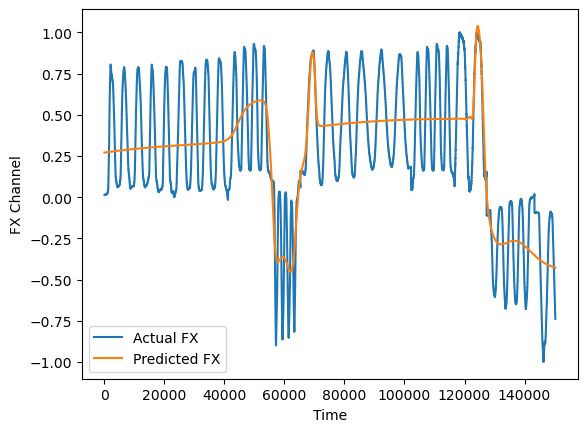

In [64]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual FX')
plt.plot(predicted, label='Predicted FX')
plt.xlabel('Time')
plt.ylabel('FX Channel')
plt.legend()
plt.show()


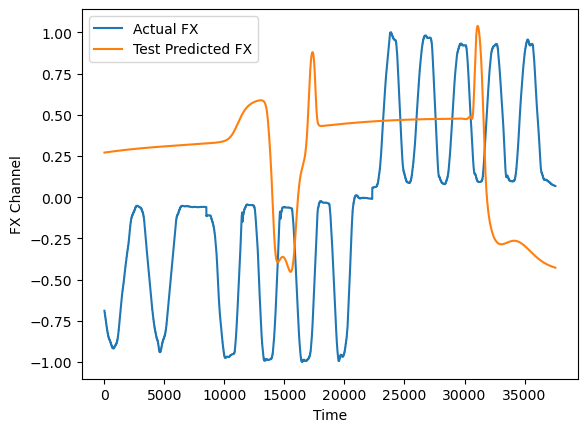

In [66]:
model.eval()
with torch.inference_mode():
    test_pred = model(X_test.to(device)).to('cpu').numpy()

plt.plot(y_test, label='Actual FX')
plt.plot(test_pred, label='Test Predicted FX')
plt.xlabel('Time')
plt.ylabel('FX Channel')
plt.legend()
plt.show()